In [1]:
!pip install missingno
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
import missingno as msno
import scipy.stats as stats
from scipy.stats import chi2

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value= -1)


pd.set_option('display.max_columns', None)

Defaulting to user installation because normal site-packages is not writeable


In [2]:
data = pd.read_csv("data.csv")
print(data.shape)
data.head(3)

(11608, 29)


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Year
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,2020
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,2020
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,Acute Care Hospitals,Proprietary,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,2020


In [3]:
#Checking for null values
data.isnull().sum()

Facility ID                                                          0
Facility Name                                                        0
Address                                                              0
City                                                                 0
State                                                                0
ZIP Code                                                             0
County Name                                                          3
Phone Number                                                         0
Hospital Type                                                        0
Hospital Ownership                                                   0
Emergency Services                                                   0
Meets criteria for promoting interoperability of EHRs                0
Hospital overall rating                                              0
Hospital overall rating footnote                                 11601
Mortal

<AxesSubplot:>

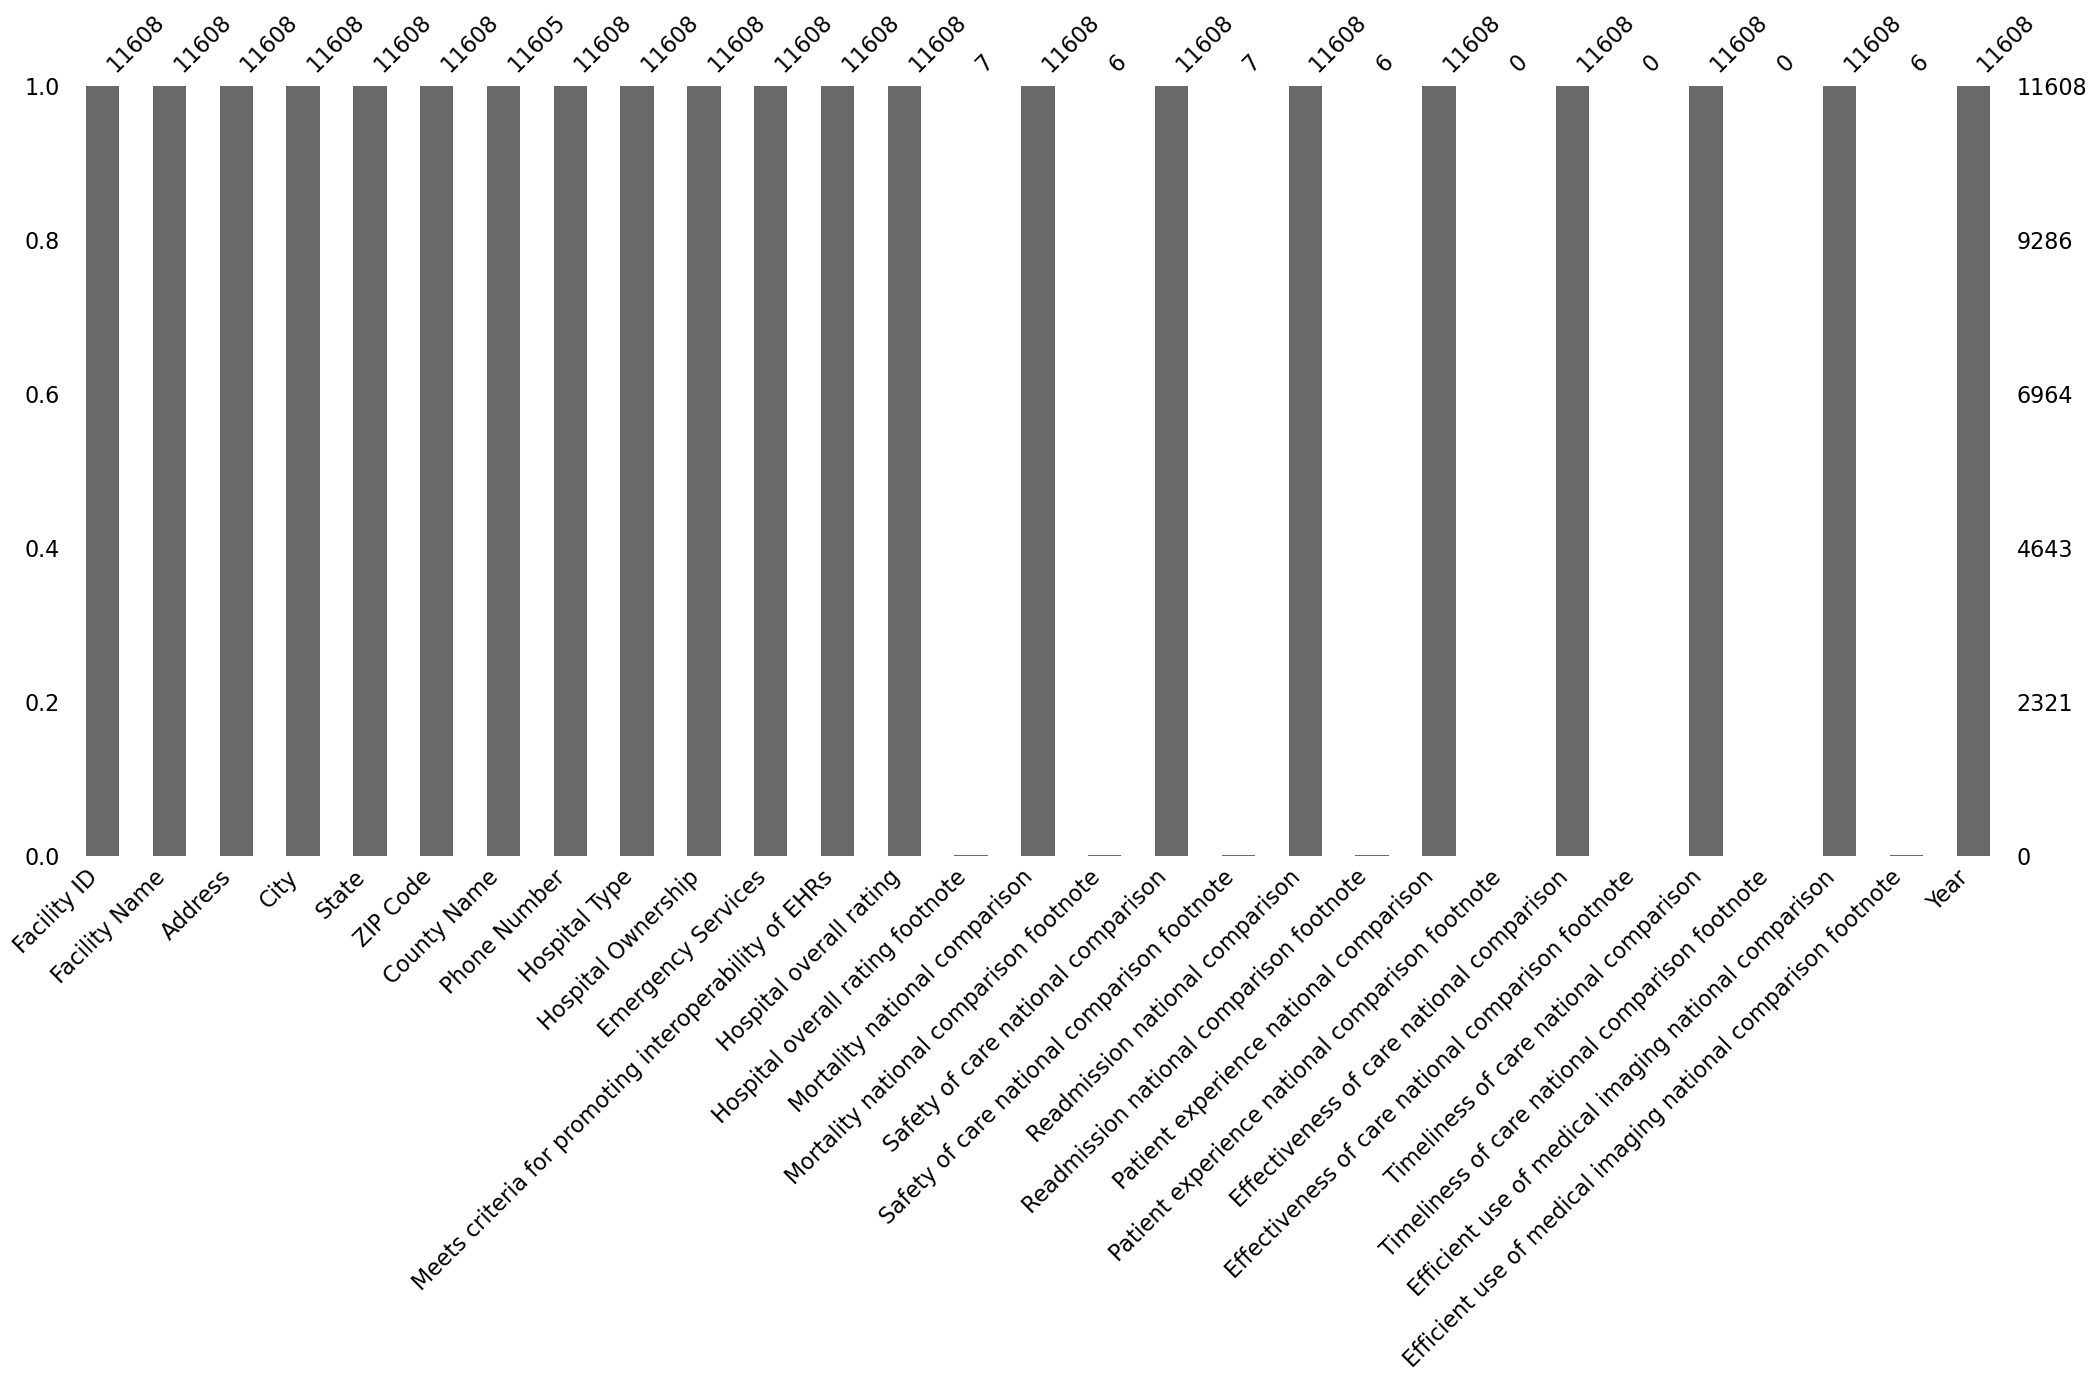

In [4]:
msno.bar(data)

In [5]:
#Droping the columns whose null value percentage >70
data = data.drop(columns =['Hospital overall rating footnote',
                  'Mortality national comparison footnote',
                 'Safety of care national comparison footnote',
                 'Readmission national comparison footnote',
                 'Patient experience national comparison footnote',
                  'Effectiveness of care national comparison footnote','Timeliness of care national comparison footnote',
                 'Efficient use of medical imaging national comparison footnote'], axis = 1)
data.head(2)

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Year
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the national average,Same as the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,2020
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average,2020


In [6]:
# Replace Country Name with mode value of Country Name (By performing groupby on Address)
data['County Name'] = data.groupby(['Address'], sort = False)['County Name'].apply(lambda x : x.fillna(x.mode().iloc[0]))

In [7]:
#Checking for null values after null value treatment
data.isnull().sum()

Facility ID                                              0
Facility Name                                            0
Address                                                  0
City                                                     0
State                                                    0
ZIP Code                                                 0
County Name                                              0
Phone Number                                             0
Hospital Type                                            0
Hospital Ownership                                       0
Emergency Services                                       0
Meets criteria for promoting interoperability of EHRs    0
Hospital overall rating                                  0
Mortality national comparison                            0
Safety of care national comparison                       0
Readmission national comparison                          0
Patient experience national comparison                  

<AxesSubplot:>

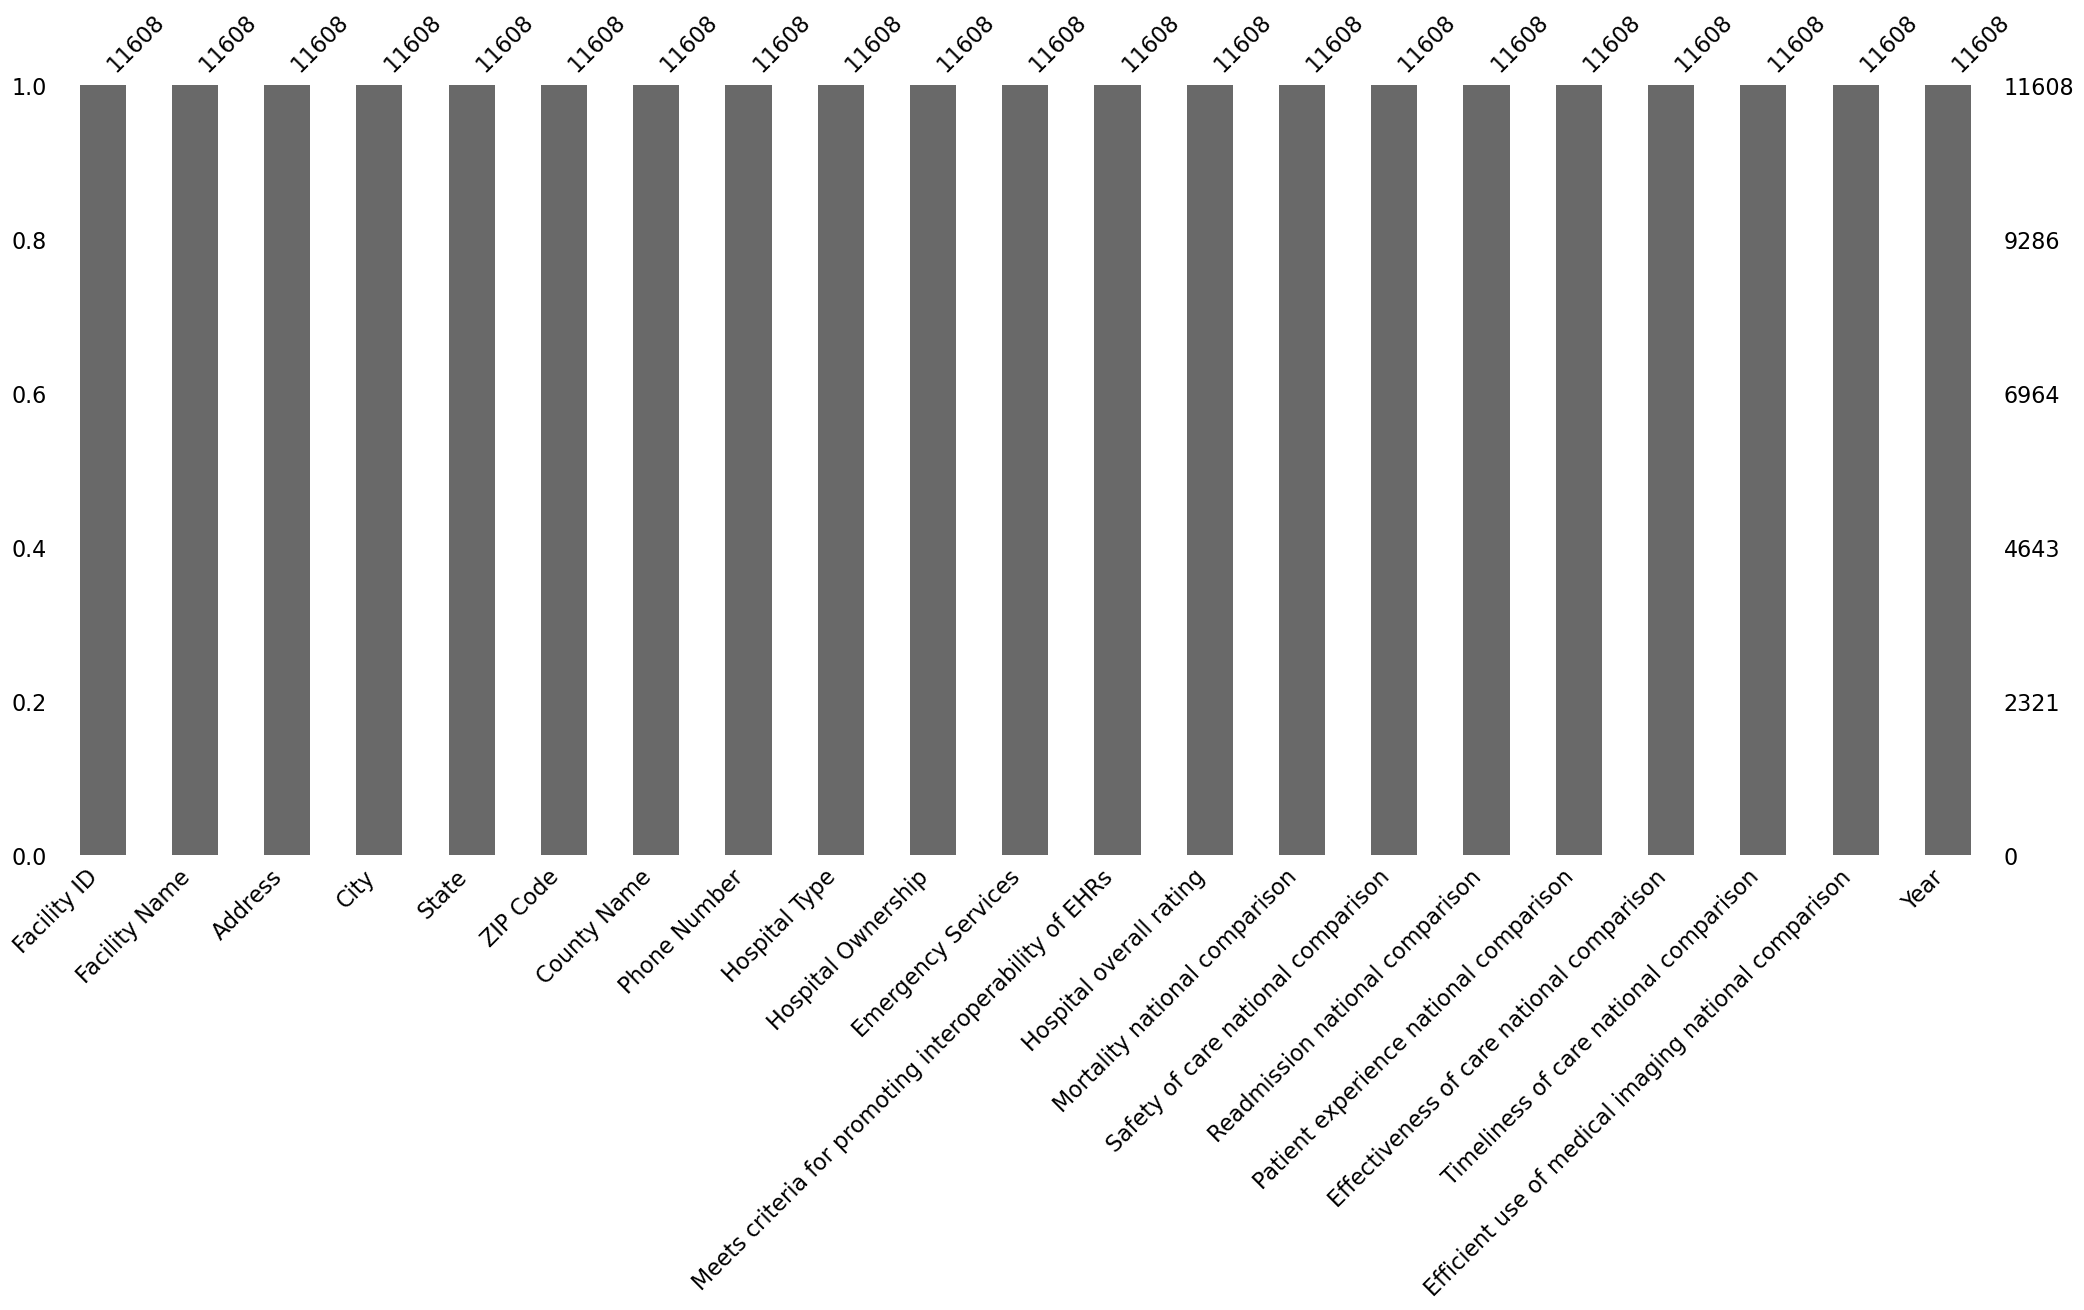

In [8]:
msno.bar(data)

There are no-null values in above created ADS. We are good to go

In [9]:
ord_encode_columns = ['Mortality national comparison',
       'Safety of care national comparison', 'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison']

mean_encode_columns = ['State', 'City', 'County Name']


In [10]:
def Encoding(data):
    
    
    # Applying mean encoding to few columns where it has many categories
    for i in mean_encode_columns:
    # Mean Encoding
        mean = data.groupby(i)['Hospital overall rating'].mean().to_dict()
        data[i] = data[i].map(mean)
        
    # Nominal Encoding
    data['Hospital Type'] = np.where(data['Hospital Type'] == 'Critical Access Hospitals', 1, 0)
    data['Emergency Services'] = np.where(data['Emergency Services'] == 'Yes', 1, 0)
    data['Meets criteria for promoting interoperability of EHRs'] = np.where(data['Meets criteria for promoting interoperability of EHRs'] == 'Y', 1, 0)
    
    nom_enc = pd.get_dummies(data['Hospital Ownership'], drop_first=True, dtype=int)
    data = pd.concat([data.drop(['Hospital Ownership'], axis=1), nom_enc], axis=1)   
    data = data.reset_index()
    data = data.drop('index', axis = 1)
    
    
    # Ordinal Encoding
    Encoding_data = data[ord_encode_columns]
    enc.fit(Encoding_data)
    Encoded_values = pd.DataFrame(enc.transform(Encoding_data), columns =ord_encode_columns)
    data = data.drop(ord_encode_columns, axis=1)
    data = pd.concat([data, Encoded_values], axis=1)
    display(data.head(3))
    return data
data_encoded = Encoding(data)
data_encoded = data_encoded.drop('Hospital overall rating', axis = 1)


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Year,Government - Hospital District or Authority,Government - Local,Government - State,Physician,Proprietary,Voluntary non-profit - Church,Voluntary non-profit - Other,Voluntary non-profit - Private,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,3.10,2.759657,36301,3.312500,(334) 793-8701,0,1,1,2,2020,1,0,0,0,0,0,0,0,3.0,5.0,3.0,3.0,5.0,5.0,5.0
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,2.20,2.759657,35957,2.769231,(256) 593-8310,0,1,1,2,2020,1,0,0,0,0,0,0,0,3.0,5.0,1.0,5.0,5.0,1.0,3.0
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,2.65,2.759657,35630,2.066667,(256) 768-8400,0,1,1,2,2020,0,0,0,0,1,0,0,0,3.0,5.0,1.0,3.0,5.0,1.0,3.0


<AxesSubplot:>

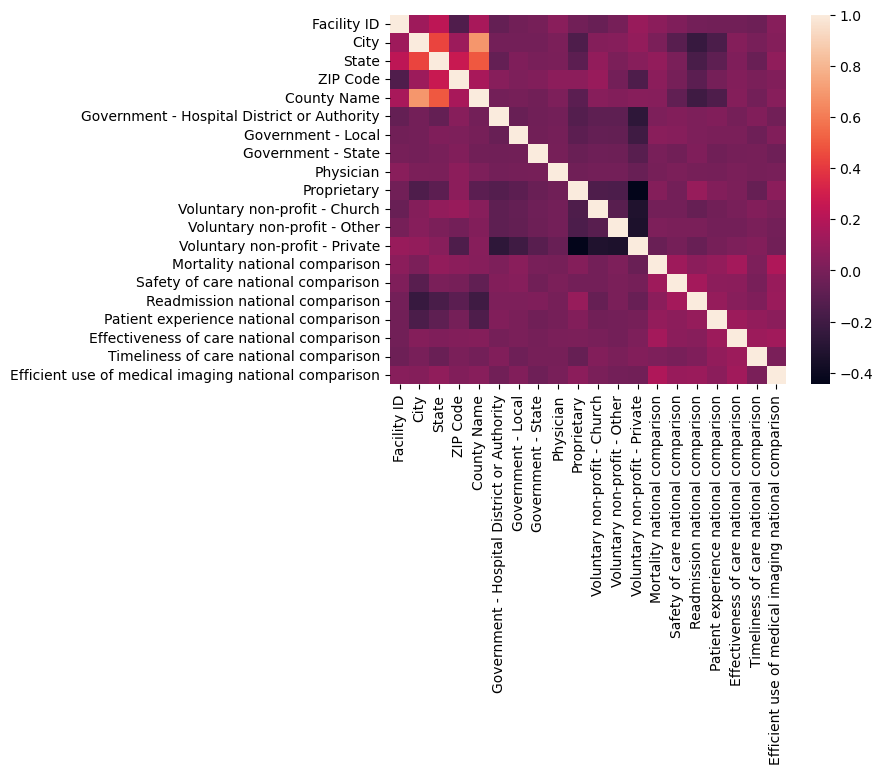

In [11]:
# plotting the correlation
cormat = data_encoded.drop(['Hospital Type','Emergency Services',
                            'Meets criteria for promoting interoperability of EHRs','Year'], axis = 1).corr()
round(cormat,2)
sns.heatmap(cormat)

<AxesSubplot:>

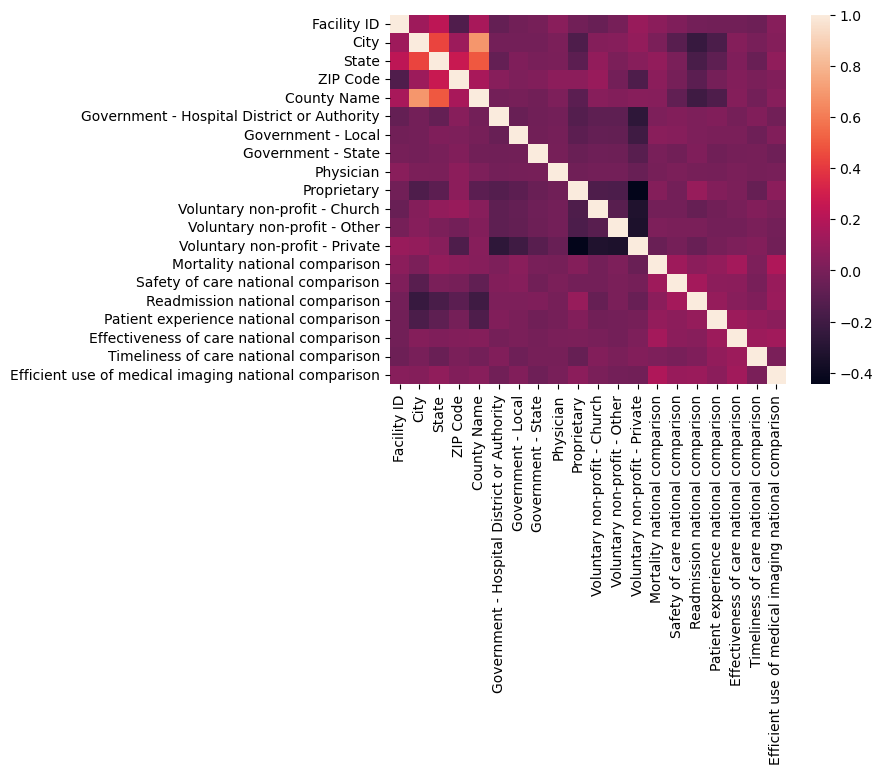

In [12]:
sns.heatmap(cormat)

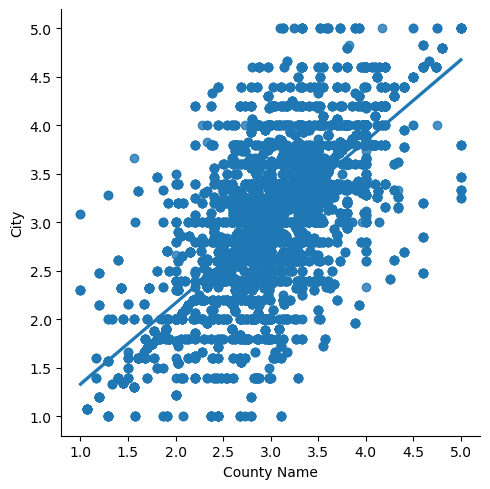

In [13]:
sns.lmplot(x="County Name", y="City",  data=data);

## Hypothesis Testing

In [14]:
def ChiSquareHyp(df):
    dataset_table=pd.crosstab(df["Cat1"],df["Target"])

    #Observed Values
    Observed_Values = dataset_table.values 
    print("Observed Values :-\n",Observed_Values)
    
    # Chi square Stats and Expected Values
    chi2_stat, p_value, dof, Expected_Values=stats.chi2_contingency(dataset_table)
    print(f"chi2 statistic:     {chi2_stat:.5g}")
    print(f"p-value:            {p_value:.5g}")
    print(f"degrees of freedom: {dof}")
    print("expected frequencies:\n",Expected_Values)
    
    
    # Calculating Critical Value and Chi Square Statistics
    no_of_rows=len(dataset_table.iloc[0:2,0])
    no_of_columns=len(dataset_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom:-",ddof)
    alpha = 0.05
    
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    print("chi-square statistic:-",chi_square_statistic)
    
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    print('critical_value:',critical_value)
    

    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    

In [15]:
data['Target'] = data['Hospital overall rating'].map({0:'Low',
                                                 1:'Below Average',
                                                 2:'Average',
                                                 3:'Above Average',
                                                 4:'High'})
data_copy = data.drop(['Hospital overall rating'], axis = 1)

In [16]:
df_mortality = data_copy[['Target', 'Mortality national comparison']]
df_mortality = df_mortality.rename(columns = { 'Mortality national comparison':'Cat1'})
ChiSquareHyp(df_mortality)

Observed Values :-
 [[ 145   53   12  132]
 [ 422  222   61  464]
 [ 147  131   25   27]
 [ 426  519  229  145]
 [ 764  336   58  420]
 [2281 1485  448 1814]]
chi2 statistic:     704.9
p-value:            1.6827e-140
degrees of freedom: 15
expected frequencies:
 [[ 132.94352591   87.23128367   26.46163849   95.36355192]
 [ 454.41807542  298.16775033   90.44928479  325.96488947]
 [ 128.2788408    84.17053688   25.53315995   92.01746238]
 [ 512.72663942  336.42708527  102.05526658  367.79100873]
 [ 613.40609326  402.4882036   122.09492848  440.01077466]
 [2343.22682519 1537.51514026  466.40572172 1680.85231284]]
Degree of Freedom:- 1
chi-square statistic:- 230.23249875006078
critical_value: 3.841458820694124
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [17]:
df_redmission = data_copy[['Target', 'Readmission national comparison']]
df_redmission = df_redmission.rename(columns = { 'Readmission national comparison':'Cat1'})

ChiSquareHyp(df_redmission)

Observed Values :-
 [[ 295   41    1  340]
 [1185  393   57 1616]
 [ 290  341   80   44]
 [1132 1499  636  383]
 [ 471  138   14  195]
 [ 812  334   45  424]]
chi2 statistic:     2975.5
p-value:            0
degrees of freedom: 15
expected frequencies:
 [[ 263.16598551  172.67713171   52.3816645   188.77521828]
 [1263.74094371  829.20731934  251.54031209  906.51142486]
 [ 293.48643879  192.57198588   58.41677503  210.5248003 ]
 [1418.84172395  930.97715029  282.41222367 1017.7689021 ]
 [ 317.97603567  208.64090656   63.29128739  228.09177039]
 [ 627.78887238  411.92550622  124.95773732  450.32788408]]
Degree of Freedom:- 1
chi-square statistic:- 1023.996532893595
critical_value: 3.841458820694124
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
